# KNN (K-nearest neighbors)

## Import libraries

In [10]:
! pip install numpy pandas matplotlib scikit-learn

You should consider upgrading via the 'C:\Users\vrtab\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

## Review

### Generate synthetic data

In [12]:
x, y = make_classification(
  n_samples=300,
  n_features=2,
  n_informative=2,
  n_redundant=0,
  n_clusters_per_class=1,
  random_state=42,
)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

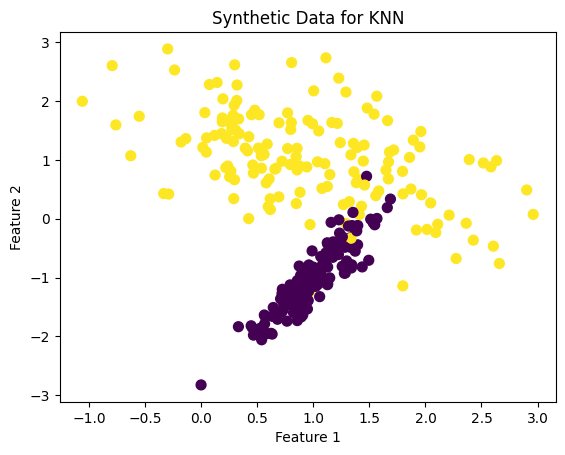

In [14]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', s=50)
plt.title("Synthetic Data for KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Apply KNN

In [15]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Predict and evaluate

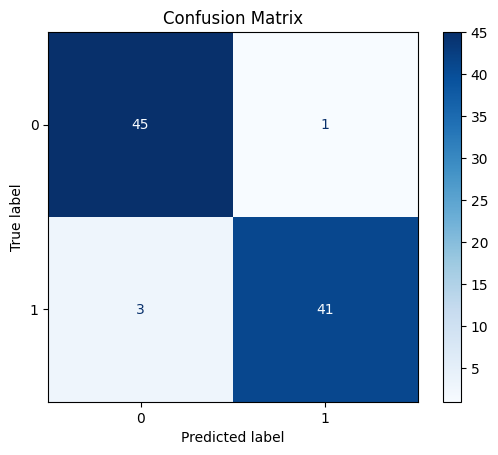

In [16]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Building a recommendation system with KNN

### Load dataset

In [17]:
music_df = pd.read_csv('music.csv')
music_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950.0,pop,hold time feel break feel untrue convince spea...,95.0,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950.0,pop,believe drop rain fall grow believe darkest ni...,51.0,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950.0,pop,sweetheart send letter goodbye secret feel bet...,24.0,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950.0,pop,kiss lips want stroll charm mambo chacha merin...,54.0,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950.0,pop,till darling till matter know till dream live ...,48.0,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019.0,hip hop,cause fuck leave scar tick tock clock come kno...,78.0,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019.0,hip hop,minks things chain ring braclets yap fame come...,67.0,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019.0,hip hop,get ban get ban stick crack relax plan attack ...,77.0,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019.0,hip hop,check check yeah yeah hear thing call switch g...,67.0,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


### Copy dataframe

In [18]:
features_df = pd.DataFrame(music_df)
features_df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950.0,pop,hold time feel break feel untrue convince spea...,95.0,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950.0,pop,believe drop rain fall grow believe darkest ni...,51.0,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950.0,pop,sweetheart send letter goodbye secret feel bet...,24.0,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950.0,pop,kiss lips want stroll charm mambo chacha merin...,54.0,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950.0,pop,till darling till matter know till dream live ...,48.0,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019.0,hip hop,cause fuck leave scar tick tock clock come kno...,78.0,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019.0,hip hop,minks things chain ring braclets yap fame come...,67.0,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019.0,hip hop,get ban get ban stick crack relax plan attack ...,77.0,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019.0,hip hop,check check yeah yeah hear thing call switch g...,67.0,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


### Drop indices column

In [19]:
features_df.drop(columns=['Unnamed: 0'], inplace=True)
features_df

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950.0,pop,hold time feel break feel untrue convince spea...,95.0,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,frankie laine,i believe,1950.0,pop,believe drop rain fall grow believe darkest ni...,51.0,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,johnnie ray,cry,1950.0,pop,sweetheart send letter goodbye secret feel bet...,24.0,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,pérez prado,patricia,1950.0,pop,kiss lips want stroll charm mambo chacha merin...,54.0,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,giorgos papadopoulos,apopse eida oneiro,1950.0,pop,till darling till matter know till dream live ...,48.0,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019.0,hip hop,cause fuck leave scar tick tock clock come kno...,78.0,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,m.o.p.,ante up (robbin hoodz theory),2019.0,hip hop,minks things chain ring braclets yap fame come...,67.0,0.001284,0.001284,0.035338,0.001284,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,nine,whutcha want?,2019.0,hip hop,get ban get ban stick crack relax plan attack ...,77.0,0.001504,0.154302,0.168988,0.001504,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,will smith,switch,2019.0,hip hop,check check yeah yeah hear thing call switch g...,67.0,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


### Describe dataset

In [20]:
features_df.describe()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,...,27448.000000,27448.000000,27448.000000,27448.000000,27448.000000,2.744800e+04,27448.000000,27448.000000,27448.000000,27448.000000
mean,1990.404765,73.086272,0.020857,0.118750,0.121134,0.057098,0.017485,0.016958,0.048285,0.076714,...,0.028005,0.130246,0.031021,0.533347,0.666034,3.368858e-01,0.080754,0.531495,0.571235,0.422789
std,18.471914,41.870594,0.051690,0.178999,0.172406,0.111352,0.040666,0.041871,0.105407,0.109672,...,0.058435,0.181745,0.071694,0.173301,0.108039,3.262966e-01,0.212099,0.251019,0.244179,0.263884
min,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,1976.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000970,0.001144,...,0.000975,0.001144,0.000993,0.412975,0.596236,3.320686e-02,0.000000,0.328112,0.381362,0.185714
50%,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,...,0.001595,0.005848,0.001754,0.538612,0.680037,2.218868e-01,0.000087,0.537304,0.581569,0.414286
75%,2007.000000,93.000000,0.004049,0.193749,0.198030,0.065781,0.010316,0.004785,0.041927,0.131892,...,0.026365,0.239309,0.032671,0.657749,0.749558,6.275097e-01,0.009737,0.738252,0.773767,0.628571
max,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


### Get dataset information

In [21]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               27448 non-null  object 
 1   track_name                27448 non-null  object 
 2   release_date              27448 non-null  float64
 3   genre                     27448 non-null  object 
 4   lyrics                    27448 non-null  object 
 5   len                       27448 non-null  float64
 6   dating                    27448 non-null  float64
 7   violence                  27448 non-null  float64
 8   world/life                27448 non-null  float64
 9   night/time                27448 non-null  float64
 10  shake the audience        27448 non-null  float64
 11  family/gospel             27448 non-null  float64
 12  romantic                  27448 non-null  float64
 13  communication             27448 non-null  float64
 14  obscen

### Drop rows with N/A values

In [22]:
features_df.isnull().sum()

artist_name                 924
track_name                  924
release_date                924
genre                       924
lyrics                      924
len                         924
dating                      924
violence                    924
world/life                  924
night/time                  924
shake the audience          924
family/gospel               924
romantic                    924
communication               924
obscene                     924
music                       924
movement/places             924
light/visual perceptions    924
family/spiritual            924
like/girls                  924
sadness                     924
feelings                    924
danceability                924
loudness                    924
acousticness                924
instrumentalness            924
valence                     924
energy                      924
topic                       924
age                         924
dtype: int64

In [23]:
features_df.dropna(inplace=True)
features_df.isnull().sum()

artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [24]:
len(features_df)

27448

### Represent categorical values as integers

In [25]:
features_df['artist'] = pd.Categorical(features_df['artist_name']).codes
features_df['genre'] = pd.Categorical(features_df['genre']).codes
features_df['topic'] = pd.Categorical(features_df['topic']).codes
features_df

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist
0,mukesh,mohabbat bhi jhoothi,1950.0,4,hold time feel break feel untrue convince spea...,95.0,0.000598,0.063746,0.000598,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,5,1.000000,3141
1,frankie laine,i believe,1950.0,4,believe drop rain fall grow believe darkest ni...,51.0,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,7,1.000000,1562
2,johnnie ray,cry,1950.0,4,sweetheart send letter goodbye secret feel bet...,24.0,0.002770,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1,1.000000,2252
3,pérez prado,patricia,1950.0,4,kiss lips want stroll charm mambo chacha merin...,54.0,0.048249,0.001548,0.001548,0.001548,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,4,1.000000,3576
4,giorgos papadopoulos,apopse eida oneiro,1950.0,4,till darling till matter know till dream live ...,48.0,0.001350,0.001350,0.417772,0.001350,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,4,1.000000,1691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019.0,2,cause fuck leave scar tick tock clock come kno...,78.0,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,3,0.014286,2793
28368,m.o.p.,ante up (robbin hoodz theory),2019.0,2,minks things chain ring braclets yap fame come...,67.0,0.001284,0.001284,0.035338,0.001284,...,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,3,0.014286,2785
28369,nine,whutcha want?,2019.0,2,get ban get ban stick crack relax plan attack ...,77.0,0.001504,0.154302,0.168988,0.001504,...,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,3,0.014286,3266
28370,will smith,switch,2019.0,2,check check yeah yeah hear thing call switch g...,67.0,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,3,0.014286,5240


### Drop lyrics column

In [26]:
features_df.drop(columns=['lyrics'], inplace=True)
features_df

,artist_name,track_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist
0,mukesh,mohabbat bhi jhoothi,1950.0,4,95.0,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,5,1.000000,3141
1,frankie laine,i believe,1950.0,4,51.0,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,7,1.000000,1562
2,johnnie ray,cry,1950.0,4,24.0,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1,1.000000,2252
3,pérez prado,patricia,1950.0,4,54.0,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,4,1.000000,3576
4,giorgos papadopoulos,apopse eida oneiro,1950.0,4,48.0,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,4,1.000000,1691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019.0,2,78.0,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,3,0.014286,2793
28368,m.o.p.,ante up (robbin hoodz theory),2019.0,2,67.0,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,3,0.014286,2785
28369,nine,whutcha want?,2019.0,2,77.0,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,3,0.014286,3266
28370,will smith,switch,2019.0,2,67.0,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,3,0.014286,5240


### Final result

In [27]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27448 entries, 0 to 28371
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               27448 non-null  object 
 1   track_name                27448 non-null  object 
 2   release_date              27448 non-null  float64
 3   genre                     27448 non-null  int8   
 4   len                       27448 non-null  float64
 5   dating                    27448 non-null  float64
 6   violence                  27448 non-null  float64
 7   world/life                27448 non-null  float64
 8   night/time                27448 non-null  float64
 9   shake the audience        27448 non-null  float64
 10  family/gospel             27448 non-null  float64
 11  romantic                  27448 non-null  float64
 12  communication             27448 non-null  float64
 13  obscene                   27448 non-null  float64
 14  music      

### Standardize the features

In [28]:
num_features_df = features_df.drop(columns=['artist_name', 'track_name'])

weights = np.array([
  0.10,  # release_date
  0.30,  # genre
  0.05,  # len
  0.05,  # dating
  0.05,  # violence
  0.05,  # world/life
  0.05,  # night/time
  0.05,  # shake the audience
  0.05,  # family/gospel
  0.10,  # romantic
  0.05,  # communication
  0.05,  # obscene
  0.10,  # music
  0.05,  # movement/places
  0.05,  # light/visual perceptions
  0.05,  # family/spiritual
  0.05,  # like/girls
  0.05,  # sadness
  0.05,  # feelings
  0.10,  # danceability
  0.05,  # loudness
  0.05,  # acousticness
  0.05,  # instrumentalness
  0.10,  # valence
  0.10,  # energy
  0.05,  # topic
  0.05,  # age
  0.10,  # artist
])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(num_features_df)
features_scaled = features_scaled * weights
features_scaled

array([[-0.2187402 ,  0.15293229,  0.02616888, ...,  0.01093946,
         0.1093701 ,  0.03012021],
       [-0.2187402 ,  0.15293229, -0.02637492, ...,  0.06147234,
         0.1093701 , -0.07130431],
       [-0.2187402 ,  0.15293229, -0.05861771, ..., -0.0901263 ,
         0.1093701 , -0.02698328],
       ...,
       [ 0.15480667, -0.14148717,  0.00467368, ..., -0.03959342,
        -0.07740334,  0.03814938],
       [ 0.15480667, -0.14148717, -0.00726809, ..., -0.03959342,
        -0.07740334,  0.1649461 ],
       [ 0.15480667, -0.14148717,  0.01183875, ..., -0.03959342,
        -0.07740334, -0.03661828]])

### Apply KNN

In [29]:
features_df

,artist_name,track_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,artist
0,mukesh,mohabbat bhi jhoothi,1950.0,4,95.0,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,5,1.000000,3141
1,frankie laine,i believe,1950.0,4,51.0,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,7,1.000000,1562
2,johnnie ray,cry,1950.0,4,24.0,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1,1.000000,2252
3,pérez prado,patricia,1950.0,4,54.0,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,4,1.000000,3576
4,giorgos papadopoulos,apopse eida oneiro,1950.0,4,48.0,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,4,1.000000,1691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019.0,2,78.0,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,3,0.014286,2793
28368,m.o.p.,ante up (robbin hoodz theory),2019.0,2,67.0,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,3,0.014286,2785
28369,nine,whutcha want?,2019.0,2,77.0,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,3,0.014286,3266
28370,will smith,switch,2019.0,2,67.0,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,3,0.014286,5240


### Fit the KNN model

In [30]:
knn = NearestNeighbors(metric='minkowski', algorithm='brute')
knn.fit(features_scaled)

def recommend_songs(artist_name, track_name, num_recommendations=5):
  song_index = features_df.index[(features_df['artist_name'] == artist_name) & (features_df['track_name'] == track_name)].tolist()
  iloc_index = features_df.index.get_loc(song_index[0]) if song_index else None
  distances, indices = knn.kneighbors([features_scaled[iloc_index]], n_neighbors=num_recommendations + 1)
  recommended_indices = indices[0][1:]
  recommendations = features_df.iloc[recommended_indices][['artist_name', 'track_name']]
  return recommendations.values, distances[0][1:]

In [31]:
artist_name = 'travis scott'
track_name = '5% tint'

recommendations, distances = recommend_songs(artist_name, track_name, 10)

print(f'Song: {artist_name} — {track_name}\n')
print('Recommended Songs:')
for (artist, track), distance in zip(recommendations, distances):
  print(f'{artist} — {track} ({distance})')

Song: travis scott — 5% tint

Recommended Songs:
yelawolf — let's roll (0.16847997911750592)
travis scott — apple pie (0.18352570826304168)
travis scott — yosemite (0.18894140353448613)
travis scott — stop trying to be god (0.18921236847523873)
playboi carti — flatbed freestyle (0.19590622426353074)
the weeknd — six feet under (0.1965440231518718)
tory lanez — ferris wheel (feat. trippie redd) (0.2069708046169474)
post malone — wow. (0.20860161137462718)
the weeknd — the hills (0.2097191713769141)
pnb rock — middle child (0.21646919927050853)
